# Introduction

We all know cities create a huge carbon footprint, transportation is one of the major contributors to both air pollution and the greenhouse effect. Modern cities are increasingly embracing car-free city centres in order to make cities greener, livelier and more inclusive. In Oslo, the capital city of Norway, City Bike Sharing Platform is one of the public sharing services that has played an important role in making this transformation successful.

To improve the accessibility and efficiency of the bike sharing system, we need to understand the riders behavior, the usage of bike stations and the routes riders have experienced, so that bike sharing operations can make sure enough bikes are in the right place at the right time. Since Covid-19 pandemic has disrupted the world, how those behaviors have changed, has the new normal "working from home" made any impact on bike usage. In addition, how we optimize the data and extract insights which can help city bike management to set up strategies to encourage more people to ride bikes instead of driving cars. Those are the initial thoughts brought me to this project. 

__Project target audience__: Oslo City Bike management/operation team 


### Project Goals

In this project, the primary goal is to understand riders behavior, usage of stations and existing rouotes by answering following questions: 

😷 How have the riding changed since pandemic?

📅 When do they ride? at different granularity levels of date, such as year, season, month, day and hour.

🏞️ Where do riders go? 

💼 Map out the "rush hour" of different stations

📈 What are the most popular cycling routes in Oslo?

🚴 How far do they go?

In addition, we want to find insights to encourage more people to ride bikes instead of driving cars. The idea could be to show people how efficient it is to ride a bike and how much carbon emission is saved if taking a bike instead of a car based on the historical data. So in this project, we will also look into: 

⚡️ Compare the efficiency between cycling and driving? 

♻️ How much CO2 emission has cycling saved?


### Data

This project analyzes bike historical trip data from __Oslo City Bike website__ <https://oslobysykkel.no/en/open-data/historical>

The period we will cover is from 2019 until 2021/Aug so we can compare before and after  pandemic.

We also need additional data such as `distance` between origin and destination, and `travel time` if taking a car. We will use __Google Distance Matrix API__ to compute that.  

### Analysis

We will use __descriptive statistics__ and __data visualization__ to find key figures in understanding the data and answer our questions.

We will also reshape the dataset for creating __an interactive dashboard__ in __Tableau__.So we could select particular station or time period to get better understanding. 

                                                               __Sophie Hou  2021/09/20

### Table of Contents<a id='tablecontents'></a>

* [Import Python Modules](#modules)
* [Loading the data](#loadingdata)
* [Explore the Data](#exploredata)
* [Manage and Clean the Data](#cleandata)
    * [Check/Clean the Data](#datacheck)
    * [Create Dataset for Tableau](#tableau)
    * [Prepare the Data](#dataprepare)
* [Analysis the Data](#analysis)
    * [Analysis Part#1](#analysis1)
    * [Analysis Part#2](#analysis2)
    * [Analysis Part#3](#analysis3)
    * [Analysis Part#4](#analysis4)
* [Conclusions](#conclusion)
* [Next Steps](#next)

## Import Python Modules<a class="anchor" id="modules"></a>


First import the modules being used for this project:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium

from datetime import datetime

## Loading the Data<a class="anchor" id="loadingdata"></a>
[*Go back: Table of Contents*](#tablecontents)

To analyze the bike trip data from Oslo Citybike, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

At OlsoCitybike website, trip data is separated by different months in CSV format. In order to pull all into one `DataFrame`, we first use `for loop` create all urls into a list called `csv_files`, then use `pd.read_csv()` in `for loop` to append all data into a list, then concat all into one `DataFrame` called `trip_df`. 

When we read each CSV file, we convert date to `datetime` and set `started_at` as index in favor of further analysis work. We also drop columns `start_station_description` and `end_station_description`.

Here is each variables info in the original datasets from Oslo Citybike:

* __started_at:__		Timestamp of when the trip started
* __ended_at:__		Timestamp of when the trip ended
* __duration:__		Duration of trip in seconds
* __start_station_id:__		Unique ID for start station
* __start_station_name:__		Name of start station
* __start_station_description:__		Description of where start station is located
* __start_station_latitude:__ 	Latitude of start station
* __start_station_longitude:__	Longitude of start station
* __end_station_id:__	Unique ID for end station
* __end_station_name:__	Name of end station
* __end_station_description:__	Description of where end station is located
* __end_station_latitude:__	Latitude of end station
* __end_station_longitude:__	Longitude of end station

In [2]:
web_holder = 'https://data.urbansharing.com/oslobysykkel.no/trips/v1/'

month_list = pd.date_range('2019-04','2021-09', 
              freq='M').strftime("%Y/%m").tolist()

csv_files = []

for m in month_list:
    url = web_holder + m + '.csv'
    csv_files.append(url)

In [3]:
df_list = []

for filename in csv_files:

  data = pd.read_csv(filename, index_col='started_at', parse_dates=['started_at', 'ended_at'])
  data = data.drop(['start_station_description', 'end_station_description'], axis=1)
                     
  df_list.append(data)
    

trip_df = pd.concat(df_list)

## Explore the Data <a class="anchor" id="exploredata"></a>
[*Go back: Table of Contents*](#tablecontents)

In [4]:
# Have a look at the dataframe we just imported
trip_df.head()

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,
2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,59.920259,10.760629,381,Grønlands torg,59.912520,10.762240
2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,59.926224,10.729625,556,Pilestredet,59.926224,10.729625
2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,59.933558,10.726426,471,Marienlyst,59.932454,10.721769
2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,59.939244,10.774319,393,Hans Nielsen Hauges plass,59.939244,10.774319
2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,59.920995,10.750358,557,Akersgata,59.914197,10.742883


In [5]:
print('Dataframe trip_df shape (rows, columns): {}'.format(trip_df.shape))

Dataframe trip_df shape (rows, columns): (4918520, 10)


In [6]:
print('Data contains total {} trips.'.format(len(trip_df)))

Data contains total 4918520 trips.


In [7]:
print('Data contain trips start from {},\nend by {}.'.format(trip_df.index.min(), trip_df.ended_at.max()))

Data contain trips start from 2019-04-02 22:18:47.926000+00:00,
end by 2021-08-31 23:13:50.516000+00:00.


In [8]:
# Look at the data types
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4918520 entries, 2019-04-02 22:18:47.926000+00:00 to 2021-08-31 22:56:54.613000+00:00
Data columns (total 10 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   ended_at                 datetime64[ns, UTC]
 1   duration                 object             
 2   start_station_id         object             
 3   start_station_name       object             
 4   start_station_latitude   float64            
 5   start_station_longitude  float64            
 6   end_station_id           object             
 7   end_station_name         object             
 8   end_station_latitude     float64            
 9   end_station_longitude    float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 412.8+ MB


__Data type for `duration` should be `int`, will change when we check and evaluate the data quality.__

In [9]:
# check if there is null value in the dataset
trip_df.isnull().sum()

ended_at                   0
duration                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
dtype: int64

__Great! there is no NULL value.__

<Figure size 1440x360 with 0 Axes>

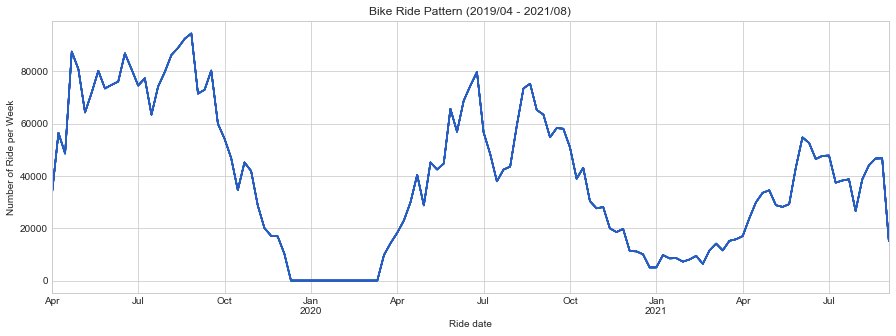

In [10]:
# Look at the trend of number of trip per week from 2019/04 to 2021/08
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5))
trip_df.resample('W').count().plot(figsize=(15,5),color='#275DC0',legend=None)
plt.title('Bike Ride Pattern (2019/04 - 2021/08)')
plt.ylabel('Number of Ride per Week')
plt.xlabel('Ride date');

__From observation above, we can see:__
* Most trips happened during the warm season.
* Overall people bike less since Covid-19.
* There was a drop down around August each year. (The hypothesis:probably during that month, a lot of people took holiday, no need to go to office, so the demanding on the bike decreased. Will check if the most bike usage happens during office rush hours to confirm if our guess is right.)

## Manage and Clean the Data<a class="anchor" id="cleandata"></a>
[*Go back: Table of Contents*](#tablecontents)




### Check/Clean the Data <a class="anchor" id="datacheck"></a>
[*Go back: Table of Contents*](#tablecontents)

__Before proceed any deeper analysis, let's check the data's quality and do the cleaning if need.__

* __First:__ check if one unique station_id associates one unique station_name and station's latitude/longitude. Because as per experience, such data with description info normally has issue with different value due to how the description written down.

* __Second:__ check if the duration value in each route makes any sense, any outliers and unexpected values.

In [11]:
trip_df.groupby(['start_station_id','start_station_name','start_station_latitude','start_station_longitude'])\
               .size().reset_index()['start_station_id'].duplicated(keep=False).sum()

172

*Seems our suspect is right, there are different station names, or different latitude/longitude for the same station_id. We must clean it up. First let's see how those look like:*

In [12]:
# detect starting with the start_station
trip_origins = trip_df.groupby(['start_station_id','start_station_name','start_station_latitude','start_station_longitude'])\
                               .size().reset_index(name='number_trips')
trip_origins.head(3)

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,number_trips
0,377,Tøyenparken,59.915667,10.777566,15500
1,378,Colosseum Kino,59.929843,10.711285,7266
2,378,Colosseum Kino,59.929853,10.711515,6508


In [13]:
# See what the duplicated start_station_ids look like
trip_origins[trip_origins.start_station_id.duplicated(keep=False)]

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,number_trips
1,378,Colosseum Kino,59.929843,10.711285,7266
2,378,Colosseum Kino,59.929853,10.711515,6508
5,382,Stensgata,59.929586,10.732839,9374
6,382,Stensgata,59.929634,10.732839,7206
14,390,Saga Kino,59.914002,10.732869,11339
...,...,...,...,...,...
330,735,Oslo Hospital,59.903213,10.767344,16318
331,737,Munkegata,59.908255,10.767800,1540
332,737,Munkegata trikkestopp,59.908255,10.767800,30180
334,739,Hammersborg Torg,59.916521,10.749202,9148


*From the above observation, we can see the same start_station_ids, some have the same name, but slightly different on latitude/longitude, some have the same latitude/longitude, but name spelling is a bit different. Let's check if the end_stations have same issues*

In [14]:
# detect end_station_ids
trip_dests = trip_df.groupby(['end_station_id','end_station_name','end_station_latitude','end_station_longitude'])\
                               .size().reset_index(name='number_trips')
trip_dests.head(3)

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,number_trips
0,377,Tøyenparken,59.915667,10.777566,13983
1,378,Colosseum Kino,59.929843,10.711285,7163
2,378,Colosseum Kino,59.929853,10.711515,6383


In [15]:
# See what the duplicated end_station_ids look like
trip_dests[trip_dests.end_station_id.duplicated(keep=False)]

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,number_trips
1,378,Colosseum Kino,59.929843,10.711285,7163
2,378,Colosseum Kino,59.929853,10.711515,6383
5,382,Stensgata,59.929586,10.732839,9235
6,382,Stensgata,59.929634,10.732839,6993
14,390,Saga Kino,59.914002,10.732869,11452
...,...,...,...,...,...
330,735,Oslo Hospital,59.903213,10.767344,16372
331,737,Munkegata,59.908255,10.767800,1554
332,737,Munkegata trikkestopp,59.908255,10.767800,32997
334,739,Hammersborg Torg,59.916521,10.749202,9820


__From what we can see above, end_station has the same issue as start_station, which is the same station_id that has different input on name or latitude/longitude. The easy way to clean up this issue is to use `pd.transform('last')` which to rewrite the group value with the first row value. Why use 'last' not 'first', because the last should be the most updated info__

In [16]:
trip_df[['start_station_name', 
              'start_station_latitude', 
              'start_station_longitude']] = trip_df.groupby('start_station_id')\
                                            [['start_station_name', 'start_station_latitude', 
                                              'start_station_longitude']].transform('last')

In [17]:
trip_df[['end_station_name', 
              'end_station_latitude', 
              'end_station_longitude']] = trip_df.groupby('end_station_id')\
                                            [['end_station_name', 'end_station_latitude', 
                                              'end_station_longitude']].transform('last')

In [18]:
trip_df.shape

(4918520, 10)

In [19]:
# After clean up, check if each start station unique id has unique name/latitude/longitude.
trip_df.groupby(['start_station_id','start_station_name','start_station_latitude','start_station_longitude'])\
               .size().reset_index()['start_station_id'].duplicated(keep=False).sum()

0

In [20]:
# After clean up, check if each end station unique id has unique name/latitude/longitude.
trip_df.groupby(['end_station_id','end_station_name','end_station_latitude','end_station_longitude'])\
               .size().reset_index()['end_station_id'].duplicated(keep=False).sum()

0

__Great! all the duplicated value problems got cleaned up.__

__Next, check `duration`__

In [21]:
# first check datatype of duration to int
trip_df['duration'] = trip_df['duration'].astype('int')

<AxesSubplot:>

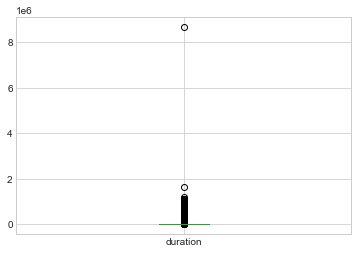

In [22]:
# Use boxplot to detect the ouitliers
trip_df.boxplot(column = 'duration')

In [23]:
# from above observation, there are big outliers, let's see how it looks like
trip_df.sort_values('duration', ascending=False).head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,
2020-06-12 22:58:29.631000+00:00,2020-09-21 11:40:40.126000+00:00,8685730,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551
2020-06-13 11:45:45.435000+00:00,2020-07-02 12:05:04.999000+00:00,1642759,626,Drammensveien,59.920404,10.691147,432,St. Hanshaugen park sør,59.924821,10.739909
2019-10-11 15:23:57.415000+00:00,2019-10-25 11:06:28.593000+00:00,1194151,408,Tøyen skole,59.914943,10.773977,440,Lakkegata,59.917209,10.762213
2019-04-06 12:12:32.245000+00:00,2019-04-19 15:35:59.607000+00:00,1135407,613,Schives gate,59.920956,10.714056,532,Brynseng T-bane,59.909184,10.814314
2019-04-13 18:31:33.384000+00:00,2019-04-26 21:09:08.363000+00:00,1132654,437,Sentrum Scene,59.915468,10.751141,436,Vestkanttorvet,59.924403,10.713069


In [24]:
# Let's zoom in one single route from station 'Birkelunden' to station'Torggata':
trip_df[(trip_df['start_station_name'] == 'Birkelunden') & (trip_df['end_station_name'] == 'Torggata')].sort_values('duration', ascending=False).head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,
2020-06-12 22:58:29.631000+00:00,2020-09-21 11:40:40.126000+00:00,8685730,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551
2019-10-02 09:27:27.923000+00:00,2019-10-02 19:43:12.024000+00:00,36944,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551
2019-06-14 21:02:06.309000+00:00,2019-06-15 06:58:58.416000+00:00,35812,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551
2019-04-29 20:50:54.564000+00:00,2019-04-29 23:57:43.334000+00:00,11208,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551
2019-08-30 12:45:43.334000+00:00,2019-08-30 15:08:18.505000+00:00,8555,424,Birkelunden,59.925611,10.760926,489,Torggata,59.915983,10.751551


__Let's use Google API to check what the normal time will be taken for route from station 'Birkelunden' to station'Torggata'__

In [137]:
import googlemaps

In [138]:
API_key = 'my key'# you can replace with your API key
gmaps = googlemaps.Client(key=API_key)

In [139]:
# we take start_station Birkelunden (59.925611,10.760926) and end_Station Torggata(59.916012,10.751655)
start = (59.925611,10.760926)
end = (59.916012,10.751655)
distance = gmaps.distance_matrix(start, end, mode='bicycling')["rows"][0]["elements"][0]["distance"]["value"]  
distance = distance/1000
print('The distance between \'Birkelunden\' and \'Torggata\' is {}km'.format(distance))

The distance between 'Birkelunden' and 'Torggata' is 1.436km


In [140]:
duration = gmaps.distance_matrix(start, end, mode='bicycling')["rows"][0]["elements"][0]["duration"]["value"]
print('The duration between \'Birkelunden\' and \'Torggata\' by bike is {} seconds'.format(duration))

The duration between 'Birkelunden' and 'Torggata' by bike is 289 seconds


*From our observation, there is definitely something not right with duration value in the dataset. So we checked with Oslo Citybike and we got the answer:
> Hi! Thanks for sharing your findings so far! This could be people not returning the bike properly and then going back to lock it. The user can keep the bike for up to 7 hours maximum, so any trip lasting longer than that is either a user error or some other fault. /Bård 

So we are going to clean this issue by replacing the duration which is > 7 hours(25200seconds) by taking the average of the duration which <= 7 hours.

Meantimes, we will copy all those odd records into one separate dataframe and check if there are any patterns among those records in order to find a solution to improve our data quality in future. 

__Before we do any change on duration, we'd better check the minimum value of duration to see if anything strange.__

In [25]:
trip_df.sort_values('duration', ascending=True).head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,
2019-11-11 17:20:01.432000+00:00,2019-11-11 17:21:02.657000+00:00,61,617,Bjerregaardsgate Øst,59.927168,10.749755,617,Bjerregaardsgate Øst,59.927168,10.749755
2019-11-06 07:59:42.028000+00:00,2019-11-06 08:00:43.471000+00:00,61,478,Jernbanetorget,59.911901,10.749929,478,Jernbanetorget,59.911901,10.749929
2020-08-22 10:05:46.587000+00:00,2020-08-22 10:06:48.195000+00:00,61,610,Sotahjørnet,59.909982,10.791448,610,Sotahjørnet,59.909982,10.791448
2021-05-01 11:38:38.909000+00:00,2021-05-01 11:39:40.392000+00:00,61,445,Sjølyst,59.921673,10.676660,445,Sjølyst,59.921673,10.676660
2019-07-05 05:11:44.858000+00:00,2019-07-05 05:12:46.596000+00:00,61,459,Valkyrieplassen,59.928132,10.718420,413,Majorstuen,59.929045,10.716926


*From above observation, 61seconds is not unusual for a single trip, but there are some trips that have __same start_station and end_station__, that could be some rider took the bike, but did not ride, just put back again. So this kind of trip should be invalid trip, and need to be __removed from the datasets__. 

In [26]:
print("This process will remove {} records from the datasets".format(len(trip_df[trip_df['start_station_id'] == trip_df['end_station_id']])))

This process will remove 142445 records from the datasets


In [27]:
# Remove the trip with same start_station and end_station
trip_df = trip_df[trip_df['start_station_id'] != trip_df['end_station_id']]

In [28]:
print("The dataset now has {} records in total".format(len(trip_df)))

The dataset now has 4776075 records in total


In [29]:
# let's double check if trips with same start_station and end_station has been removed
trip_df.sort_values('duration', ascending=True).head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,
2020-05-14 13:11:59.954000+00:00,2020-05-14 13:13:01.388000+00:00,61,413,Majorstuen,59.929045,10.716926,459,Valkyrieplassen,59.928132,10.718420
2019-05-15 21:45:12.795000+00:00,2019-05-15 21:46:14.077000+00:00,61,405,Frognerbadet,59.928080,10.708767,453,Frogner Stadion,59.927538,10.710263
2019-10-17 12:08:40.225000+00:00,2019-10-17 12:09:41.425000+00:00,61,559,Hoffsveien,59.923898,10.676034,627,Skøyen Stasjon,59.922724,10.678625
2019-10-21 17:42:38.942000+00:00,2019-10-21 17:43:40.305000+00:00,61,559,Hoffsveien,59.923898,10.676034,627,Skøyen Stasjon,59.922724,10.678625
2019-10-09 18:46:39.867000+00:00,2019-10-09 18:47:41.481000+00:00,61,624,Dælenenggata,59.928750,10.767546,503,Fagerheimgata,59.927606,10.765985


__Next we are going to deal with the duration>7hours(25200seconds)__
* First we make a copy of those odd records, named dataframe `trip_odd`.
* Then, replace the duration > 7 hours(25200seconds) by taking the average of the duration <= 7 hours. We are going to use `fillna` + `groupby` + `transform` + `mean` to accomplish this. We'd better make new columns for the route, so it's easy to get groupby. We anyway need create the routes columns for late analysis

In [30]:
#make a copy of those odd records (duration>7hours), name dataframe trip_odd
trip_odd = trip_df[trip_df.duration > 25200]

In [31]:
print("There are {} records with duration over 7 hours".format(len(trip_odd)))

There are 1688 records with duration over 7 hours


In [32]:
# Quick look where those wrong duration happened
trip_odd.start_station_name.value_counts()

Rådhusbrygge 4               36
Birkelunden                  27
Tjuvholmen                   25
Alexander Kiellands Plass    25
Tøyen skole                  24
                             ..
Monolittveien                 1
Diakonhjemmet                 1
Valkyrieplassen               1
Pilestredet                   1
Colbjørnsens gate             1
Name: start_station_name, Length: 240, dtype: int64

* The error with duration mostly happened at stations:
Rådhusbrygge 4, Birkelunden, Alexander Kiellands Plass, Tjuvholmen and Tøyen skole

We will not dig more with those error data more. We will focus on those valid trip records.

In [33]:
# Make route_id with the concast start_station_id and end_station_id
trip_df['route_id'] = trip_df['start_station_id'].apply(str) + trip_df['end_station_id'].apply(str)

In [34]:
# Make route with start_station_name--end_station_name
trip_df['route'] = trip_df['start_station_name'] + '--' + trip_df['end_station_name']

In [35]:
# Make the start_coordinator with start_station_latitude and longitude
trip_df['start_coordinator'] = trip_df['start_station_latitude'].apply(str)+','+trip_df['start_station_longitude'].apply(str)

In [36]:
# Make the end_coordinator with end_station_latitude and longitude
trip_df['end_coordinator'] = trip_df['end_station_latitude'].apply(str)+','+trip_df['end_station_longitude'].apply(str)

In [37]:
# replace duration > 7hours (25200seconds) with NaN
trip_df.loc[trip_df.duration>25200, 'duration'] = np.NaN

In [38]:
# fillna the NaN value with group mean
trip_df['duration'] = trip_df['duration'].fillna(trip_df.groupby('route_id')['duration'].transform('mean'))

In [39]:
# check there is no trip with same start_coordinator and end_coordinator
trip_df[trip_df['start_coordinator']==trip_df['end_coordinator']]

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,route_id,route,start_coordinator,end_coordinator
started_at,,,,,,,,,,,,,,


__Finally we got all the data cleaned. Next step is to prepare data for further analysis by creating columns `year`, `month`, `weekday` and `hour`. Since we will use Tableau to create a interactive visualization in dashboard with routes and filters, so we transform the data columns to meet Tableau requirement and then export it.__

### Create dataset for Tableau <a class="anchor" id="tableau"></a>
[*Go back: Table of Contents*](#tablecontents)

In [40]:
trip_tb = trip_df.reset_index()
trip_tb = trip_tb[['started_at', 'route_id', 'route', 'start_coordinator', 'end_coordinator']]
trip_tb.head(3)

,started_at,route_id,route,start_coordinator,end_coordinator
0,2019-04-02 22:18:47.926000+00:00,401381,Lille Schous plass--Grønlands torg,"59.920258999999994,10.760629","59.912519999999994,10.76224"
1,2019-04-02 22:26:39.308000+00:00,561471,Kirkeveien--Marienlyst,"59.93347989334691,10.726294394131088","59.9324324985211,10.721762294477472"
2,2019-04-03 03:10:02.415000+00:00,597557,Fredensborg--Akersgata,"59.920995,10.750358","59.9141971,10.7428828"


In [41]:
trip_tb = pd.melt(trip_tb, id_vars=['started_at', 'route_id', 'route'],
                  value_vars=['start_coordinator', 'end_coordinator'],
                  var_name='origin_destination', value_name='coordinates')

In [42]:
trip_tb = trip_tb.sort_values(['started_at','origin_destination'], ascending=[True, False]).reset_index(drop=True)
trip_tb.head(3)

,started_at,route_id,route,origin_destination,coordinates
0,2019-04-02 22:18:47.926000+00:00,401381,Lille Schous plass--Grønlands torg,start_coordinator,"59.920258999999994,10.760629"
1,2019-04-02 22:18:47.926000+00:00,401381,Lille Schous plass--Grønlands torg,end_coordinator,"59.912519999999994,10.76224"
2,2019-04-02 22:26:39.308000+00:00,561471,Kirkeveien--Marienlyst,start_coordinator,"59.93347989334691,10.726294394131088"


In [43]:
trip_tb[['latitude','longitude']] = trip_tb.coordinates.str.split(',',expand=True)
trip_tb[['station1', 'station2']] = trip_tb.route.str.split('--', expand=True)

In [44]:
trip_tb['station'] = np.where(trip_tb['origin_destination'] == 'start_coordinator',
                              trip_tb['station1'], trip_tb['station2'])

In [45]:
trip_tb['origin_destination'] = trip_tb['origin_destination'].map({'start_coordinator':'origin',
                                                                  'end_coordinator':'destination'})

In [46]:
trip_tb.head(3)

,started_at,route_id,route,origin_destination,coordinates,latitude,longitude,station1,station2,station
0,2019-04-02 22:18:47.926000+00:00,401381,Lille Schous plass--Grønlands torg,origin,"59.920258999999994,10.760629",59.920258999999994,10.760629,Lille Schous plass,Grønlands torg,Lille Schous plass
1,2019-04-02 22:18:47.926000+00:00,401381,Lille Schous plass--Grønlands torg,destination,"59.912519999999994,10.76224",59.912519999999994,10.76224,Lille Schous plass,Grønlands torg,Grønlands torg
2,2019-04-02 22:26:39.308000+00:00,561471,Kirkeveien--Marienlyst,origin,"59.93347989334691,10.726294394131088",59.93347989334691,10.726294394131088,Kirkeveien,Marienlyst,Kirkeveien


In [47]:
trip_tb = trip_tb[['started_at', 'origin_destination', 'station', 'route', 'route_id',
                     'latitude', 'longitude']]

In [48]:
trip_tb.head(4)

,started_at,origin_destination,station,route,route_id,latitude,longitude
0,2019-04-02 22:18:47.926000+00:00,origin,Lille Schous plass,Lille Schous plass--Grønlands torg,401381,59.920258999999994,10.760629
1,2019-04-02 22:18:47.926000+00:00,destination,Grønlands torg,Lille Schous plass--Grønlands torg,401381,59.912519999999994,10.76224
2,2019-04-02 22:26:39.308000+00:00,origin,Kirkeveien,Kirkeveien--Marienlyst,561471,59.93347989334691,10.726294394131088
3,2019-04-02 22:26:39.308000+00:00,destination,Marienlyst,Kirkeveien--Marienlyst,561471,59.9324324985211,10.721762294477472


In [49]:
trip_tb.shape

(9552150, 7)

In [50]:
# Export final cleaned and transformed dataset in csv file which will be used in Tableau.
trip_tb.to_csv('trip_tb.csv', index=False)

### Prepare the Data <a class="anchor" id="dataprepare"></a>
[*Go back: Table of Contents*](#tablecontents)

__Next step prepare data for further analysis by creating columns `year`, `month`, `weekday` and `hour`__

In [52]:
# create column "date"
trip_df['date'] = trip_df.index.date

In [53]:
# create column "year"
trip_df['year'] = trip_df.index.year

In [54]:
# create column "is_pandemic" with timeline 2020/2/26 when first covid case in Normway
trip_df['is_pandemic'] = np.where(trip_df.index>'20200226', 'is_pandemic', 'no_pandemic')

In [55]:
# create column "month"
trip_df['month'] = trip_df.index.month_name()

In [56]:
# make month in order
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
trip_df['month'] = pd.Categorical(trip_df['month'], categories=months, ordered=True)

In [57]:
# create column "weekday"
trip_df['dayofweek'] = trip_df.index.day_name()

In [58]:
# make weekday in order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
trip_df['dayofweek'] = pd.Categorical(trip_df['dayofweek'], categories=weekdays, ordered=True)

In [59]:
# create column "is_weekend"
trip_df['is_weekend'] = np.where((trip_df.dayofweek=='Saturday')|(trip_df.dayofweek=='Sunday'),
                              'is_weekend','no_weekend')

In [60]:
# create column "weekdays"
trip_df['weekday'] = np.where((trip_df.dayofweek=='Saturday')|(trip_df.dayofweek=='Sunday'),
                              'weekend','weekday')

In [61]:
# create column "hour in 24hr format"
trip_df['hour'] = trip_df.index.hour

In [62]:
# Map months with seasons
season_map = {"January": "Winter",
              "February": "Winter",
              "March" : "Spring",
              "April" : "Spring",
              "May" : "Spring",
              "June": "Summer",
              "July": "Summer",
              "August":"Summer",
              "September": "Autumn",
              "October": "Autumn",
              "November": "Autumn",
              "December": "Winter"}

In [63]:
# create column "season"
trip_df['season'] = trip_df['month'].map(season_map)

In [64]:
seasons = ["Spring", "Summer", "Autumn", "Winter"]
trip_df['season'] = pd.Categorical(trip_df['season'], categories=seasons, ordered=True)

In [65]:
# Take a look the final dataset
trip_df.head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,end_coordinator,date,year,is_pandemic,month,dayofweek,is_weekend,weekday,hour,season
started_at,,,,,,,,,,,,,,,,,,,,,
2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337.0,401,Lille Schous plass,59.920259,10.760629,381,Grønlands torg,59.912520,10.762240,...,"59.912519999999994,10.76224",2019-04-02,2019,no_pandemic,April,Tuesday,no_weekend,weekday,22,Spring
2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320.0,561,Kirkeveien,59.933480,10.726294,471,Marienlyst,59.932432,10.721762,...,"59.9324324985211,10.721762294477472",2019-04-02,2019,no_pandemic,April,Tuesday,no_weekend,weekday,22,Spring
2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282.0,597,Fredensborg,59.920995,10.750358,557,Akersgata,59.914197,10.742883,...,"59.9141971,10.7428828",2019-04-03,2019,no_pandemic,April,Wednesday,no_weekend,weekday,3,Spring
2019-04-03 03:16:21.557000+00:00,2019-04-03 03:27:20.124000+00:00,658.0,471,Marienlyst,59.932432,10.721762,412,Jakob kirke,59.917866,10.754898,...,"59.917866000000004,10.754897999999999",2019-04-03,2019,no_pandemic,April,Wednesday,no_weekend,weekday,3,Spring
2019-04-03 03:39:11.948000+00:00,2019-04-03 03:42:46.377000+00:00,214.0,598,Sofienbergparken nord,59.923229,10.766171,401,Lille Schous plass,59.920259,10.760629,...,"59.920258999999994,10.760629",2019-04-03,2019,no_pandemic,April,Wednesday,no_weekend,weekday,3,Spring


In [66]:
print('The final dataset shape (rows, columns): {}'.format(trip_df.shape))

The final dataset shape (rows, columns): (4776075, 23)


## Analysis the Data<a class="anchor" id="analysis"></a>
[*Go back: Table of Contents*](#tablecontents)


### Analysis Part#1<a class="anchor" id="analysis1"></a>
[*Go back: Table of Contents*](#tablecontents)

😷 How have the riding changed since pandemic?

📅 When do they ride? at different granularity levels of date, such as year, season, month, day and hour.

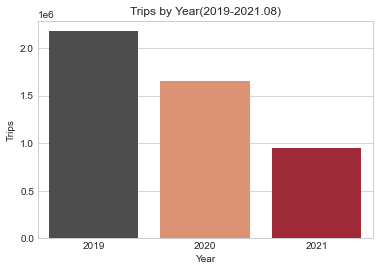

In [67]:
# Visualize the number of trip in Y2019, Y2020 and Y2021
colors = ['#4d4d4d','#ef8a62','#b2182b']
sns.countplot(data=trip_df, x='year', palette=sns.color_palette(colors))
plt.title('Trips by Year(2019-2021.08)')
plt.ylabel('Trips')
plt.xlabel('Year');

In [68]:
trip_df.groupby('year').size().reset_index(name='trips')

,year,trips
0,2019,2177326
1,2020,1648804
2,2021,949945


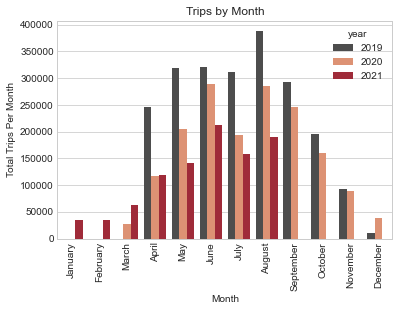

In [69]:
# Use count plot to visualize trip monthly in different year
sns.countplot(data=trip_df, x='month', hue='year', palette=sns.color_palette(colors))
plt.title('Trips by Month')
plt.ylabel('Total Trips Per Month')
plt.xlabel('Month')
plt.xticks(rotation=90);

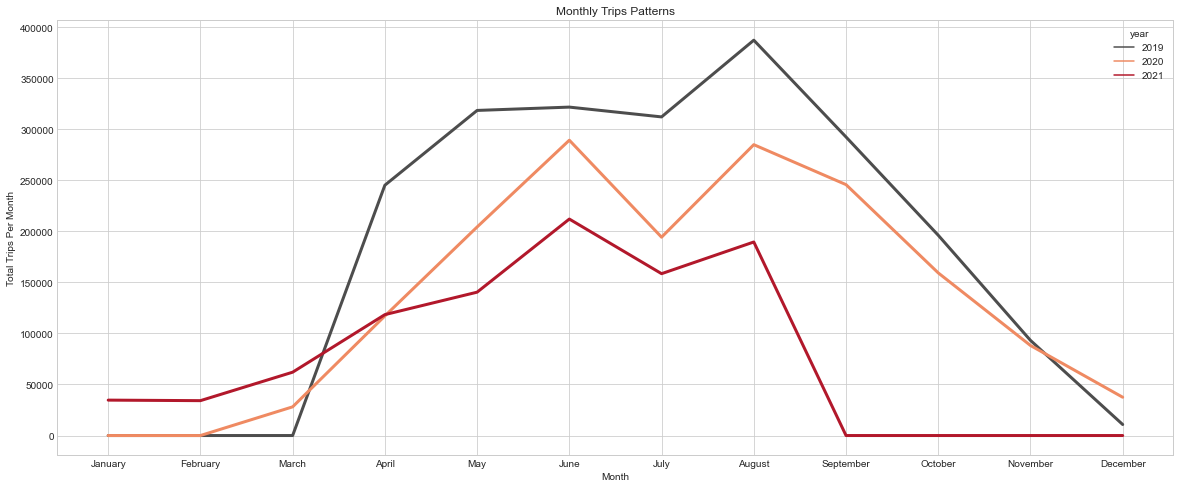

In [70]:
# Use line plot to visualize the number of trip across all months in Y2019, Y2020 and Y2021
colors = ['#4d4d4d','#ef8a62','#b2182b']

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df.groupby(['year','month']).size().reset_index(name = 'trips'),\
             x='month', y='trips', hue='year', linewidth = 3, palette=sns.color_palette(colors))

plt.title('Monthly Trips Patterns')
plt.ylabel('Total Trips Per Month')
plt.xlabel('Month');

__From observation above, we can clearly see:__
* People ride bikes most in the warm season (numbers of trips begin to rise from March, then drop from August).
* There is also a drop every year during summer around July. We guess it's because a lot of people take vacation and don't need to go to work.
* Overall people bike less since Covid-19, from 2019 with normal situation, then decreased in 2020 when Covid-19 started, and will continue decreasing in 2021. Since situation is still uncertain and a lot companies already announced allow work from home even back to normal, wish that in mind, if the usage of bike can get back to the level of 2019 would be in doubt. Suggest keep analyzing the data and the trend, find the pattern, and adjust the bike placing and selling strategy accordingly.

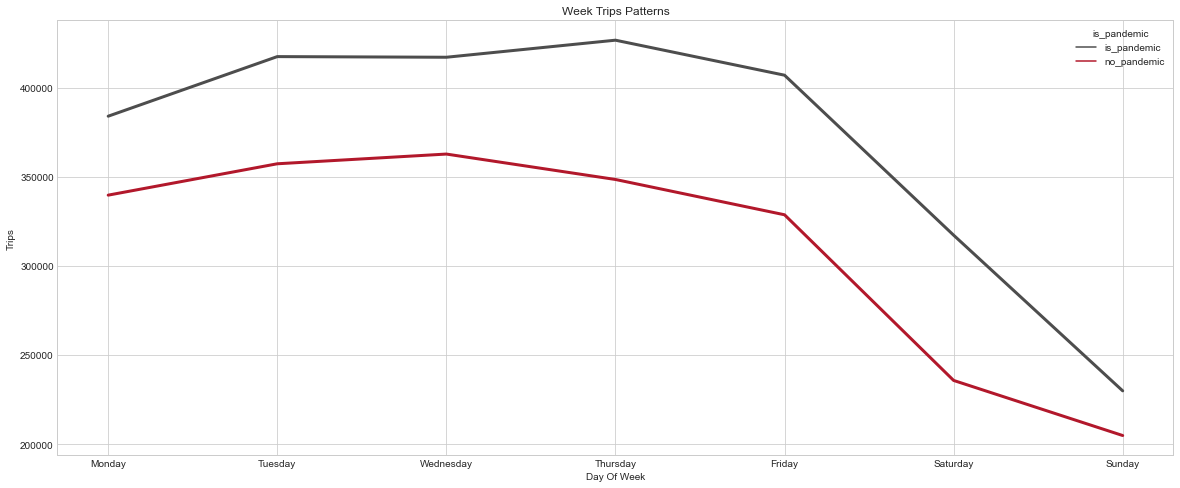

In [71]:
# Visualize trips pattern in week basic before pandemic and in pandemic
colors = ['#4d4d4d','#b2182b']

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df.groupby(['dayofweek','is_pandemic']).size().reset_index(name = 'trips'),\
             x='dayofweek', y='trips', hue='is_pandemic', linewidth = 3, palette=sns.color_palette(colors))

plt.title('Week Trips Patterns')
plt.ylabel('Trips')
plt.xlabel('Day Of Week');

__From observation above, we can clearly see:__
* People ride bikes most during the weekdays from Monday to Friday.
* The most busy days are Tuesday, Wednesday and Thursday.
* Same pattern before pandemic and in pandemic

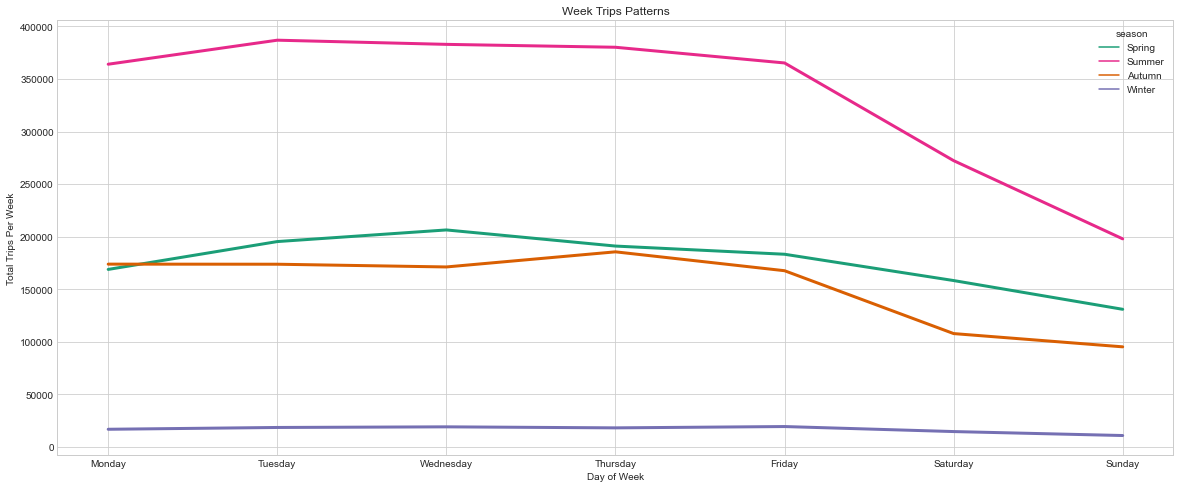

In [72]:
# Visualize trips among weekdays in different seasons
colors = ['#1b9e77','#e7298a','#d95f02','#7570b3']
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df.groupby(['season', 'dayofweek']).size().reset_index(name = 'trips'),\
             x='dayofweek', y='trips', hue='season', linewidth = 3, palette=sns.color_palette(colors))

plt.title('Week Trips Patterns')
plt.ylabel('Total Trips Per Week')
plt.xlabel('Day of Week');

__From observation above, we can see:__
* Between Monday to Friday is the most trip taken in spite of the seasons.
* Summer is the highest season for bikes and winter is the lowest season.

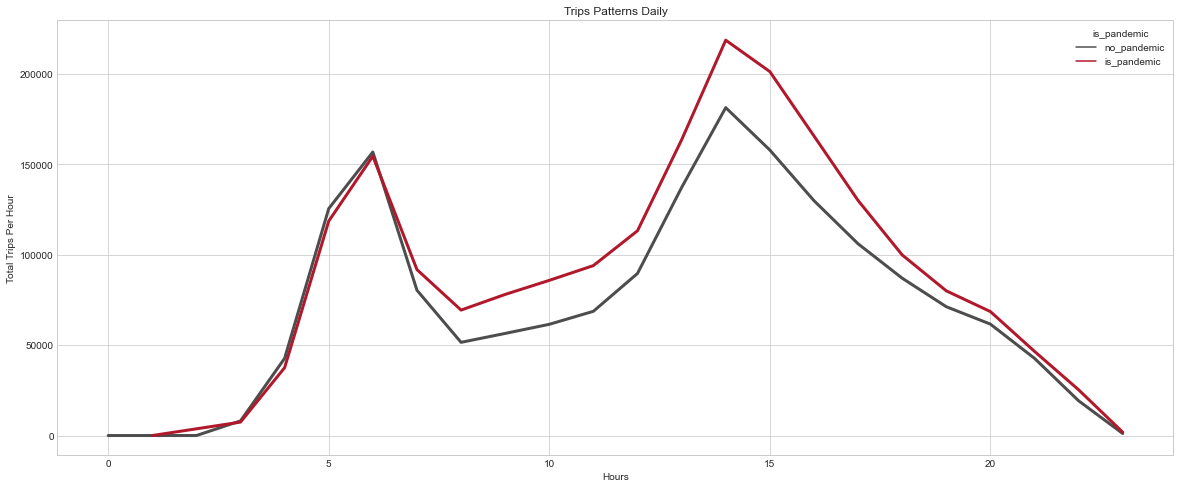

In [73]:
# Visualize the trips pattern during a weekday in hour basis and seperate before pandemic and in pandemic.
colors = ['#4d4d4d','#b2182b']

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df[trip_df.is_weekend=='no_weekend'].groupby(['hour','is_pandemic']).size().reset_index(name = 'trips'),\
             x='hour', y='trips', hue='is_pandemic', linewidth = 3, palette=sns.color_palette(colors))

plt.title('Trips Patterns Daily')
plt.ylabel('Total Trips Per Hour')
plt.xlabel('Hours');

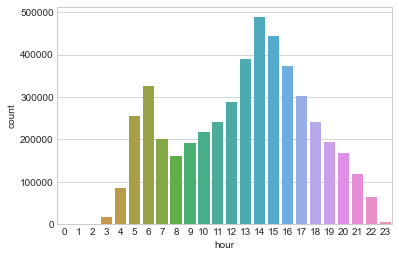

In [74]:
# Use count plot to see
sns.countplot(data=trip_df, x='hour');

__From observation above, we can see:__
* There are two peaks in a day for bike trips, one was in the morning around 6am, and another was in the afternoon around 2pm. And more trips are taken in the afternoon than in the morning.
* Same pattern before pandemic and in pandemic.

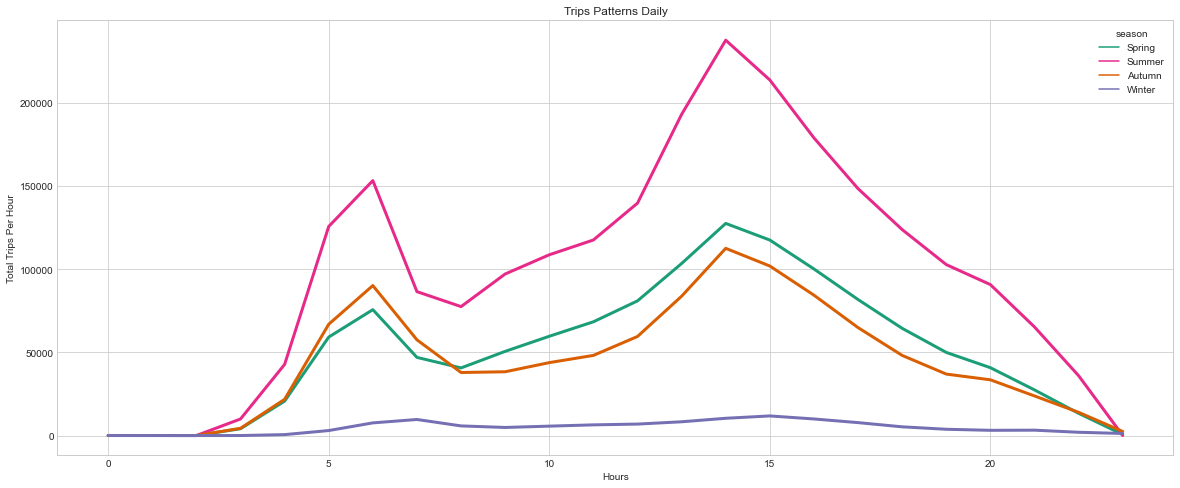

In [75]:
# Visualize to see if season play any role on day usage overall
colors = ['#1b9e77','#e7298a','#d95f02','#7570b3']

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df.groupby(['season','hour']).size().reset_index(name = 'trips'),\
             x='hour', y='trips', hue='season',linewidth = 3, palette=sns.color_palette(colors))

plt.title('Trips Patterns Daily')
plt.ylabel('Total Trips Per Hour')
plt.xlabel('Hours');

__From the observation, every season has same situation with two peaks one in the morning around 6am and one in the afternoon around 2pm.__

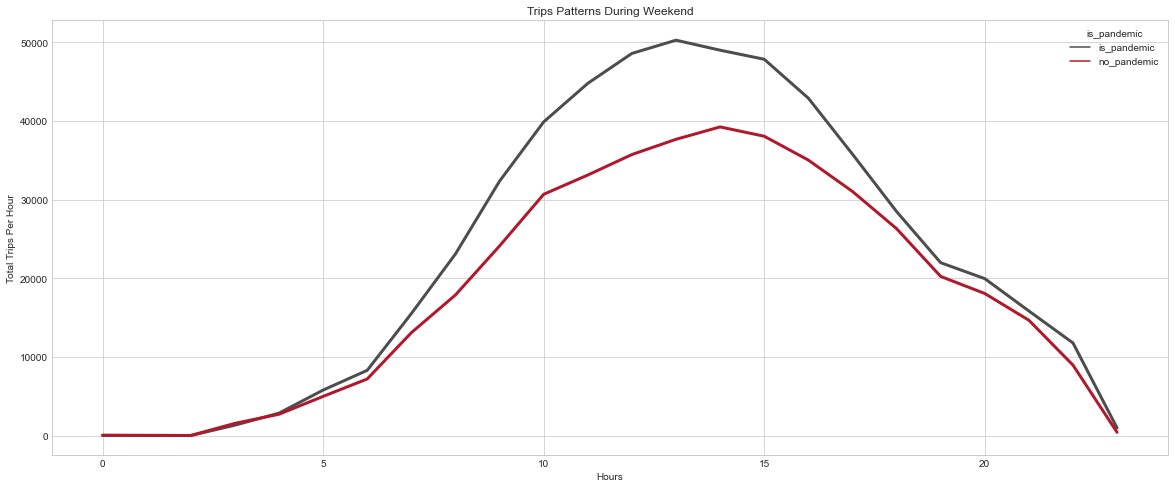

In [76]:
# Check the weekend hours
colors = ['#4d4d4d','#b2182b']

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data = trip_df[trip_df.is_weekend=='is_weekend'].\
             groupby(['hour','is_pandemic']).size().reset_index(name = 'trips'),\
             x='hour', y='trips', hue='is_pandemic', linewidth = 3, palette=sns.color_palette(colors))

plt.title('Trips Patterns During Weekend')
plt.ylabel('Total Trips Per Hour')
plt.xlabel('Hours');

__From the above observation, we can see:__

* The bike trips are very different from the weekdays, the number of usage slowly rises up from morning, until it reaches its peak around 1pm, then slowly drops down. This fit to most people's lifestyle during the weekend.
* Pattern has almost no change in pandemic.

### Analysis Part#2<a class="anchor" id="analysis2"></a>
[*Go back: Table of Contents*](#tablecontents)

Now we have sense of when the bike riding at season level, month level, week level and day level. Next step we are going to analyze the stations and answer questions: 

🏞️ Where do riders go? 

💼 Map out the "rush hour" of different stations


__First, let's take a look how many sations we are working on.__

In [77]:
print("There are total {} start_stations and {} end_stations in the dataset".
      format(trip_df.start_station_id.nunique(),trip_df.end_station_id.nunique()))

There are total 265 start_stations and 265 end_stations in the dataset


__Then, let's create new dataframe `station_trips` with number of departures and arrivals for each station in each hour.__

In [78]:
trip_origins = trip_df.groupby(['is_pandemic','is_weekend','hour','start_station_id',
                                'start_station_name','start_station_latitude','start_station_longitude'])\
                                .size().reset_index(name='number_departures')
trip_origins.head(3)

,is_pandemic,is_weekend,hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,number_departures
0,is_pandemic,is_weekend,0,388,Skovveien,59.916331,10.716349,1
1,is_pandemic,is_weekend,0,390,Saga Kino,59.914240,10.732771,1
2,is_pandemic,is_weekend,0,398,Ringnes Park,59.928434,10.759430,1


In [79]:
trip_dests = trip_df.groupby(['is_pandemic','is_weekend','hour','end_station_id',
                              'end_station_name','end_station_latitude','end_station_longitude'])\
                               .size().reset_index(name='number_arrivals')
trip_dests.head(3)

,is_pandemic,is_weekend,hour,end_station_id,end_station_name,end_station_latitude,end_station_longitude,number_arrivals
0,is_pandemic,is_weekend,0,377,Tøyenparken,59.915667,10.777566,1
1,is_pandemic,is_weekend,0,393,Hans Nielsen Hauges plass,59.939244,10.774319,1
2,is_pandemic,is_weekend,0,398,Ringnes Park,59.928434,10.759430,1


__Next step:__
Using `pd.merge(trip_origins, trip_dests, how='outer')` to join trip_origins and trip_dests to get a table which contains:
* is_pandemic
* is_weekday
* hour
* station_id
* station_name
* latitude
* longitude
* number_departures
* number_arrivals

In [80]:
station_traffic = pd.merge(trip_origins, trip_dests,
                           left_on=['is_pandemic','is_weekend','hour','start_station_id'],
                           right_on=['is_pandemic','is_weekend','hour','end_station_id'],
                           how='outer')
station_traffic.head()

,is_pandemic,is_weekend,hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,number_departures,end_station_id,end_station_name,end_station_latitude,end_station_longitude,number_arrivals
0,is_pandemic,is_weekend,0,388.0,Skovveien,59.916331,10.716349,1.0,NaN,NaN,NaN,NaN,NaN
1,is_pandemic,is_weekend,0,390.0,Saga Kino,59.914240,10.732771,1.0,NaN,NaN,NaN,NaN,NaN
2,is_pandemic,is_weekend,0,398.0,Ringnes Park,59.928434,10.759430,1.0,398.0,Ringnes Park,59.928434,10.75943,1.0
3,is_pandemic,is_weekend,0,406.0,Carl Berners plass sør,59.925070,10.775996,1.0,NaN,NaN,NaN,NaN,NaN
4,is_pandemic,is_weekend,0,416.0,Tannlegehøyskolen,59.932383,10.741475,1.0,NaN,NaN,NaN,NaN,NaN


In [81]:
station_traffic.isnull().sum()

is_pandemic                  0
is_weekend                   0
hour                         0
start_station_id           312
start_station_name         312
start_station_latitude     312
start_station_longitude    312
number_departures          312
end_station_id             336
end_station_name           336
end_station_latitude       336
end_station_longitude      336
number_arrivals            336
dtype: int64

In [82]:
station_traffic['start_station_id'].fillna(station_traffic['end_station_id'], inplace=True)
station_traffic['start_station_name'].fillna(station_traffic['end_station_name'], inplace=True)
station_traffic['start_station_latitude'].fillna(station_traffic['end_station_latitude'], inplace=True)
station_traffic['start_station_longitude'].fillna(station_traffic['end_station_longitude'], inplace=True)

In [83]:
station_traffic['number_departures'].fillna(0, inplace=True)
station_traffic['number_arrivals'].fillna(0, inplace=True)

In [84]:
station_traffic.isnull().sum()

is_pandemic                  0
is_weekend                   0
hour                         0
start_station_id             0
start_station_name           0
start_station_latitude       0
start_station_longitude      0
number_departures            0
end_station_id             336
end_station_name           336
end_station_latitude       336
end_station_longitude      336
number_arrivals              0
dtype: int64

In [85]:
# select the columns and rename the columns
station_traffic = station_traffic[['is_pandemic','is_weekend','hour',
                                   'start_station_id', 'start_station_name',
                                   'start_station_latitude','start_station_longitude',
                                  'number_departures', 'number_arrivals']]
station_traffic.columns = ['is_pandemic','is_weekend','hour',
                           'station_id', 'station_name', 'latitude','longitude',
                          'number_departures', 'number_arrivals']

In [86]:
station_traffic.isnull().sum()

is_pandemic          0
is_weekend           0
hour                 0
station_id           0
station_name         0
latitude             0
longitude            0
number_departures    0
number_arrivals      0
dtype: int64

In [87]:
station_traffic['departure_arrivals'] = station_traffic['number_departures']+station_traffic['number_arrivals']

In [88]:
station_traffic.head()

,is_pandemic,is_weekend,hour,station_id,station_name,latitude,longitude,number_departures,number_arrivals,departure_arrivals
0,is_pandemic,is_weekend,0,388.0,Skovveien,59.916331,10.716349,1.0,0.0,1.0
1,is_pandemic,is_weekend,0,390.0,Saga Kino,59.914240,10.732771,1.0,0.0,1.0
2,is_pandemic,is_weekend,0,398.0,Ringnes Park,59.928434,10.759430,1.0,1.0,2.0
3,is_pandemic,is_weekend,0,406.0,Carl Berners plass sør,59.925070,10.775996,1.0,0.0,1.0
4,is_pandemic,is_weekend,0,416.0,Tannlegehøyskolen,59.932383,10.741475,1.0,0.0,1.0


In [89]:
del trip_origins
del trip_dests

In [90]:
# take a quick look at when no pandemic what the top 8 busy stations 
top8_stations = station_traffic[station_traffic.is_pandemic=='no_pandemic'].\
                groupby(['station_id','station_name']).\
                agg({'number_departures':'sum', 'number_arrivals':'sum', 'departure_arrivals':'sum'}).\
                reset_index().nlargest(8, 'departure_arrivals')

top8_stations['trips_out_per_day'] = round(top8_stations['number_departures']/trip_df[trip_df.is_pandemic=='no_pandemic'].
                                           date.nunique(),0)
top8_stations['trips_in_per_day'] = round(top8_stations['number_arrivals']/trip_df[trip_df.is_pandemic=='no_pandemic'].
                                           date.nunique(),0)
top8_stations['trips_per_day'] = round(top8_stations['departure_arrivals']/trip_df[trip_df.is_pandemic=='no_pandemic'].
                                           date.nunique(),0)

top8_stations

,station_id,station_name,number_departures,number_arrivals,departure_arrivals,trips_out_per_day,trips_in_per_day,trips_per_day
112,494.0,Rådhusbrygge 4,29204.0,46167.0,75371.0,116.0,184.0,300.0
108,489.0,Torggata,24696.0,37717.0,62413.0,98.0,150.0,249.0
20,398.0,Ringnes Park,29602.0,28993.0,58595.0,118.0,116.0,233.0
43,421.0,Alexander Kiellands Plass,29354.0,27899.0,57253.0,117.0,111.0,228.0
163,551.0,Olaf Ryes plass,25014.0,29516.0,54530.0,100.0,118.0,217.0
58,437.0,Sentrum Scene,16662.0,36786.0,53448.0,66.0,147.0,213.0
99,479.0,Tjuvholmen,23399.0,28277.0,51676.0,93.0,113.0,206.0
100,480.0,Helga Helgesens plass,23433.0,26583.0,50016.0,93.0,106.0,199.0


In [91]:
# take a quick look at when in pandemic what the top 8 busy station
top8_stations_p = station_traffic[station_traffic.is_pandemic=='is_pandemic'].\
                groupby(['station_id','station_name']).\
                agg({'number_departures':'sum', 'number_arrivals':'sum', 'departure_arrivals':'sum'}).\
                reset_index().nlargest(8, 'departure_arrivals')

top8_stations_p['trips_out_per_day'] = round(top8_stations_p['number_departures']/trip_df[trip_df.is_pandemic=='is_pandemic'].
                                           date.nunique(),0)
top8_stations_p['trips_in_per_day'] = round(top8_stations_p['number_arrivals']/trip_df[trip_df.is_pandemic=='is_pandemic'].
                                           date.nunique(),0)
top8_stations_p['trips_per_day'] = round(top8_stations_p['departure_arrivals']/trip_df[trip_df.is_pandemic=='is_pandemic'].
                                           date.nunique(),0)

top8_stations_p

,station_id,station_name,number_departures,number_arrivals,departure_arrivals,trips_out_per_day,trips_in_per_day,trips_per_day
113,494.0,Rådhusbrygge 4,32694.0,53285.0,85979.0,61.0,100.0,161.0
162,551.0,Olaf Ryes plass,35745.0,39993.0,75738.0,67.0,75.0,142.0
42,421.0,Alexander Kiellands Plass,36198.0,36034.0,72232.0,68.0,68.0,136.0
20,398.0,Ringnes Park,35784.0,35803.0,71587.0,67.0,67.0,134.0
109,489.0,Torggata,25034.0,40299.0,65333.0,47.0,76.0,123.0
85,464.0,Sukkerbiten,29288.0,36042.0,65330.0,55.0,68.0,123.0
99,479.0,Tjuvholmen,28175.0,34728.0,62903.0,53.0,65.0,118.0
100,480.0,Helga Helgesens plass,24821.0,31062.0,55883.0,47.0,58.0,105.0


__From above observation, we can see:__

* Top busy stations before pandemic and during pandemic are almost same.
* The number 1 busy station is 'Rådhusbrygge 4' with average 61 departures and 100 arrivals a day.	

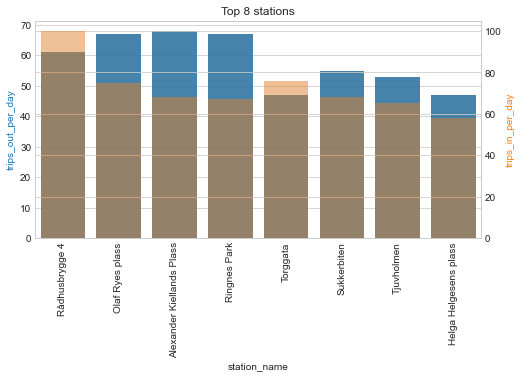

In [92]:
# Visualize the top 8 stations since pandemic.
fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_title('Top 8 stations')
ax1.set_xlabel('station_name')
ax1.set_ylabel('Number of Departures per Day', color=color)
ax2 = sns.barplot(x='station_name', y='trips_out_per_day', data = top8_stations_p, color=color, alpha=0.9)
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Arrivals per Day', color=color)
ax2 = sns.barplot(x='station_name', y='trips_in_per_day', data = top8_stations_p,  color=color, alpha=0.5)
ax2.tick_params(axis='y', color=color)

plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

* We know the tops 8 stations in overall, let's check is there any difference between weekend and weekdays.

In [93]:
# Top8 stations in weekends
top8_stations_weekend = station_traffic[station_traffic.is_weekend=='is_weekend'].\
                        groupby(['station_id','station_name']).\
                        agg({'number_departures':'sum', 'number_arrivals':'sum', 'departure_arrivals':'sum'}).\
                        reset_index().nlargest(8, 'departure_arrivals')

top8_stations_weekend['trips_out_per_day'] = round(top8_stations_weekend['number_departures']/trip_df[trip_df.is_weekend=='is_weekend'].
                                           date.nunique(),0)
top8_stations_weekend['trips_in_per_day'] = round(top8_stations_weekend['number_arrivals']/trip_df[trip_df.is_weekend=='is_weekend'].
                                           date.nunique(),0)
top8_stations_weekend['trips_per_day'] = round(top8_stations_weekend['departure_arrivals']/trip_df[trip_df.is_weekend=='is_weekend'].
                                           date.nunique(),0)

top8_stations_weekend

,station_id,station_name,number_departures,number_arrivals,departure_arrivals,trips_out_per_day,trips_in_per_day,trips_per_day
114,494.0,Rådhusbrygge 4,13837.0,22065.0,35902.0,62.0,99.0,160.0
165,551.0,Olaf Ryes plass,14507.0,15999.0,30506.0,65.0,71.0,136.0
43,421.0,Alexander Kiellands Plass,14869.0,14558.0,29427.0,66.0,65.0,131.0
20,398.0,Ringnes Park,14005.0,13734.0,27739.0,63.0,61.0,124.0
86,464.0,Sukkerbiten,11769.0,14479.0,26248.0,53.0,65.0,117.0
110,489.0,Torggata,9924.0,16122.0,26046.0,44.0,72.0,116.0
100,479.0,Tjuvholmen,11639.0,13537.0,25176.0,52.0,60.0,112.0
203,589.0,Huk,9842.0,11289.0,21131.0,44.0,50.0,94.0


In [94]:
# Top8 stations in workingdays(weekdays)
top8_stations_weekdays = station_traffic[station_traffic.is_weekend=='no_weekend'].\
                        groupby(['station_id','station_name']).\
                        agg({'number_departures':'sum', 'number_arrivals':'sum', 'departure_arrivals':'sum'}).\
                        reset_index().nlargest(8, 'departure_arrivals')

top8_stations_weekdays['trips_out_per_day'] = round(top8_stations_weekdays['number_departures']/trip_df[trip_df.is_weekend=='no_weekend'].
                                           date.nunique(),0)
top8_stations_weekdays['trips_in_per_day'] = round(top8_stations_weekdays['number_arrivals']/trip_df[trip_df.is_weekend=='no_weekend'].
                                           date.nunique(),0)
top8_stations_weekdays['trips_per_day'] = round(top8_stations_weekdays['departure_arrivals']/trip_df[trip_df.is_weekend=='no_weekend'].
                                           date.nunique(),0)

top8_stations_weekdays

,station_id,station_name,number_departures,number_arrivals,departure_arrivals,trips_out_per_day,trips_in_per_day,trips_per_day
114,494.0,Rådhusbrygge 4,48061.0,77387.0,125448.0,86.0,138.0,224.0
20,398.0,Ringnes Park,51381.0,51062.0,102443.0,92.0,91.0,183.0
110,489.0,Torggata,39806.0,61894.0,101700.0,71.0,111.0,182.0
43,421.0,Alexander Kiellands Plass,50683.0,49375.0,100058.0,91.0,88.0,179.0
165,551.0,Olaf Ryes plass,46252.0,53510.0,99762.0,83.0,96.0,178.0
100,479.0,Tjuvholmen,39935.0,49468.0,89403.0,71.0,88.0,160.0
101,480.0,Helga Helgesens plass,38664.0,46553.0,85217.0,69.0,83.0,152.0
65,443.0,Sjøsiden ved trappen,32934.0,49833.0,82767.0,59.0,89.0,148.0


__From above observsation, we can see:__

* Top stations in weekend and weekdays are almost same, except station Huk which seems more popular during weekend than weekdays.

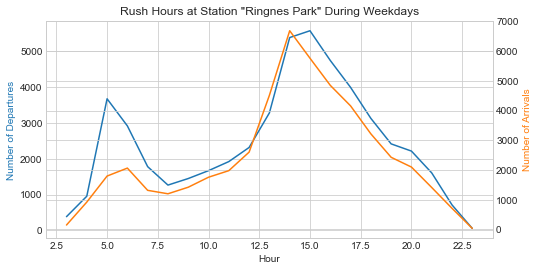

In [95]:
# zoom in rush hours during weekdays at one of the big stations called 'Ringnes Park'
data = station_traffic[(station_traffic.station_name=='Ringnes Park')& (station_traffic.is_weekend=='no_weekend')].\
                       groupby('hour').agg({'number_departures':'sum','number_arrivals':'sum'})\
                       .reset_index()

fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_title('Rush Hours at Station "Ringnes Park" During Weekdays')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Departures', color=color)
ax2 = sns.lineplot(x='hour', y='number_departures', data = data, color=color)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Arrivals', color=color)
ax2 = sns.lineplot(x='hour', y='number_arrivals', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

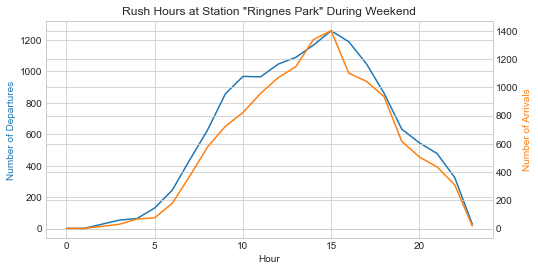

In [96]:
# zoom in rush hours during weekend at one of the big stations called 'Ringnes Park'
data = station_traffic[(station_traffic.station_name=='Ringnes Park')& (station_traffic.is_weekend=='is_weekend')].\
                       groupby('hour').agg({'number_departures':'sum','number_arrivals':'sum'})\
                       .reset_index()

fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_title('Rush Hours at Station "Ringnes Park" During Weekend')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Departures', color=color)
ax2 = sns.lineplot(x='hour', y='number_departures', data = data, color=color)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Arrivals', color=color)
ax2 = sns.lineplot(x='hour', y='number_arrivals', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

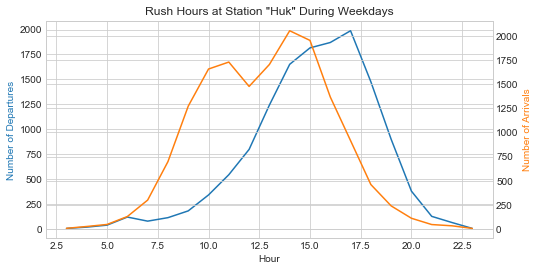

In [97]:
# zoom in rush hours during weekdays at one of the big stations called 'Huk'
data = station_traffic[(station_traffic.station_name=='Huk')& (station_traffic.is_weekend=='no_weekend')].\
                       groupby('hour').agg({'number_departures':'sum','number_arrivals':'sum'})\
                       .reset_index()

fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_title('Rush Hours at Station "Huk" During Weekdays')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Departures', color=color)
ax2 = sns.lineplot(x='hour', y='number_departures', data = data, color=color)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Arrivals', color=color)
ax2 = sns.lineplot(x='hour', y='number_arrivals', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

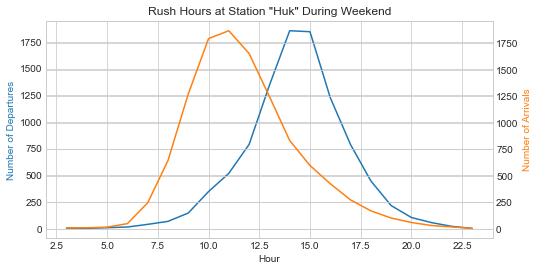

In [98]:
# zoom in rush hours during weekend at one of the big stations called 'Huk'
data = station_traffic[(station_traffic.station_name=='Huk')& (station_traffic.is_weekend=='is_weekend')].\
                       groupby('hour').agg({'number_departures':'sum','number_arrivals':'sum'})\
                       .reset_index()

fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_title('Rush Hours at Station "Huk" During Weekend')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Departures', color=color)
ax2 = sns.lineplot(x='hour', y='number_departures', data = data, color=color)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Arrivals', color=color)
ax2 = sns.lineplot(x='hour', y='number_arrivals', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

__By zoom in two stations "Ringnes Park" and "Huk", visualize the traffic seperately in weekdays and weekend, we can see:__

* Station Ringnes Park has the same rush hour on arrival traffic and departure traffic. During the weekdays, there are two peaks(rush hour), one in morning and one in afternoon as a lot of people's work routing. During the weekend, only one peak(rush hour), around 1 or 2 in the afternoon.

* However, station Huk, most arrival traffic happened in the morning time and most the departure traffic in the afternoon. During the weekend it's very clear to see that, during the weekend, the arrival traffic moved to early afternoon instead, which we think because many people go there after work.

### Analysis Part#3<a class="anchor" id="analysis3"></a>
[*Go back: Table of Contents*](#tablecontents)

__Next step, we are going to analyze routes to answer questions:__

📈 What are the most popular cycling routes in Oslo?

⚡️ Compare the efficiency between cycling and driving? 

First let's see how many routes in the datasets and meantimes take the `min`,`max`, `mean` of duration, create a new dataframe `route_df`

In [99]:
# groupby with aggfunc
route_df = trip_df.groupby(['route_id', 'route', 'start_coordinator', 'end_coordinator']).\
                            agg({'route':'count','duration':['min', 'mean', 'max']})

# rename columns for aggfunc result
route_df.columns = ['_'.join(x) for x in route_df.columns.ravel()]

route_df.head(1)

,,,,route_count,duration_min,duration_mean,duration_max
route_id,route,start_coordinator,end_coordinator,,,,
10091023,Borgenveien--Professor Aschehougs plass,"59.94274210647367,10.70383303125402","59.9147672,10.740971",5,899.0,1829.8,2898.0


In [100]:
# reset index
route_df = route_df.sort_values('route_count', ascending=False).reset_index()
# check the dataframe head
route_df.head(3)

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max
0,464443,Sukkerbiten--Sjøsiden ved trappen,"59.9051243807035,10.753763553726516","59.91015446696496,10.751980909227374",4031,118.0,409.601340,17967.0
1,479456,Tjuvholmen--Frognerstranda,"59.90946700000001,10.722509","59.9103558,10.7051061",3803,179.0,426.010521,18518.0
2,456479,Frognerstranda--Tjuvholmen,"59.9103558,10.7051061","59.90946700000001,10.722509",3640,182.0,413.120671,11536.0


In [101]:
# double check if the route agg count correct: sum of count = len(final dataset)
print('All routes total count is {} in route_df, same as total trip {} in trip_df.'
      .format(route_df.route_count.sum(), len(trip_df)))

All routes total count is 4776075 in route_df, same as total trip 4776075 in trip_df.


In [102]:
print('There are total {} routes in the dataset'.format(len(route_df)))

There are total 66202 routes in the dataset


*We are going to use __Google map distance matrix API__ to compute the __distance__ between every pair of locations. The reason we use Google APIs is that it gives you the right/actual distance, as opposed to straight-line distances (known as Euclidian distances) offered by most tools(see enclosed codes example). We will use Google API service "bicycling" distance (although you can choose "driving" distance), which means it will calculate the distance based on the actual fastest routes or paths using the actual road network system (where applicable!)*

*We will also use __Google map distance matrix API__ to get __duration__ if take public transportation using mode "transit"* 

In [223]:
import googlemaps
API_key = 'your key'#please input youor key if you are going to use this code
gmaps = googlemaps.Client(key=API_key)

In [198]:
# get distance from google map distance matrix API
distance = []

for i in range(len(route_df)):
    o = route_df.loc[i, 'start_coordinator']
    d = route_df.loc[i, 'end_coordinator']
    result = gmaps.distance_matrix(o, d, mode='bicycling')["rows"][0]["elements"][0]["distance"]["value"]  
    result = result/1000
    distance.append(result)

In [199]:
route_df["distance(Km)"] = distance

route_df.head(1)

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km)
0,464443,Sukkerbiten--Sjøsiden ved trappen,"59.9051243807035,10.753763553726516","59.91015446696496,10.751980909227374",4031,118.0,409.60134,17967.0,0.735


In [253]:
# get duration of public transportation from google map distance matrix API
duration_google = []

for i in range(len(route_df)):
    o = route_df.loc[i, 'start_coordinator']
    d = route_df.loc[i, 'end_coordinator']
    result = gmaps.distance_matrix(o, d, mode='driving')["rows"][0]["elements"][0]["duration"]["value"]
    duration_google.append(result)

In [254]:
route_df["duration_driving"] = duration_google

route_df.head(1)

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km),duration_driving
0,464443,Sukkerbiten--Sjøsiden ved trappen,"59.9051243807035,10.753763553726516","59.91015446696496,10.751980909227374",4031,118.0,409.60134,17967.0,0.735,324


In [255]:
# Export the table to save the result as will be costy if lose this data with result from DistanceMatrix API
route_df.to_csv('route_df.csv', index=False)

In [237]:
route_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66202 entries, 0 to 66201
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   route_id           66202 non-null  int64  
 1   route              66202 non-null  object 
 2   start_coordinator  66202 non-null  object 
 3   end_coordinator    66202 non-null  object 
 4   route_count        66202 non-null  int64  
 5   duration_min       66194 non-null  float64
 6   duration_mean      66194 non-null  float64
 7   duration_max       66194 non-null  float64
 8   distance(Km)       66202 non-null  float64
 9   duration_driving   66202 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 5.1+ MB


* We will create a clumn `avg_trips_per_day` to have better sense of route popularity. which is total trips of the each route / total days in our dataset

In [332]:
route_df['avg_trips_per_day'] = round(route_df.route_count / trip_df.date.nunique(), 0)

In [334]:
# take a look at the top 5 popular route:
route_df.nlargest(10,'avg_trips_per_day')

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km),duration_driving,total_distance(Km),avg_trips_per_day
0,464443,Sukkerbiten--Sjøsiden ved trappen,"59.9051243807035,10.753763553726516","59.91015446696496,10.751980909227374",4031,118.0,409.601340,17967.0,0.735,324,2962.785,5.0
1,479456,Tjuvholmen--Frognerstranda,"59.90946700000001,10.722509","59.9103558,10.7051061",3803,179.0,426.010521,18518.0,1.327,217,5046.581,5.0
2,456479,Frognerstranda--Tjuvholmen,"59.9103558,10.7051061","59.90946700000001,10.722509",3640,182.0,413.120671,11536.0,1.309,200,4764.760,5.0
3,456534,Frognerstranda--Filipstadveien,"59.9103558,10.7051061","59.9102277,10.7208788",3518,159.0,394.136519,24684.0,1.296,205,4559.328,4.0
4,551489,Olaf Ryes plass--Torggata,"59.922425,10.758182000000001","59.915983092745186,10.75155119076095",3331,152.0,372.350045,13875.0,0.938,282,3124.478,4.0
5,398421,Ringnes Park--Alexander Kiellands Plass,"59.92843404417578,10.75943014633117","59.92806670615685,10.751202636819613",3172,79.0,222.045397,5477.0,0.461,85,1462.292,4.0
6,384557,Vår Frelsers gravlund sør--Akersgata,"59.919463,10.743829","59.9141971,10.7428828",3040,90.0,229.304605,19592.0,0.622,386,1890.880,4.0
7,390494,Saga Kino--Rådhusbrygge 4,"59.914240267946475,10.732771354719743","59.9108469,10.7303766",2925,76.0,310.925812,21735.0,0.420,196,1228.500,4.0
8,390479,Saga Kino--Tjuvholmen,"59.914240267946475,10.732771354719743","59.90946700000001,10.722509",2741,150.0,444.979934,17422.0,1.036,290,2839.676,3.0
9,408507,Tøyen skole--Jens Bjelkes Gate,"59.91494300000001,10.773977","59.91917900000001,10.764161999999999",2727,121.0,271.027136,14885.0,0.785,158,2140.695,3.0


__From above, we can see:__
* The top three routes are `Sukkerbiten--Sjøsiden ved trappen`, `Tjuvholmen--Frognerstranda`, `Frognerstranda--Tjuvholmen` with average trip 5 times a day.

__Next step, we are going to compare speed/duration between cycling and driving__


In [335]:
# create a dataframe `bike_faster'
bike_faster = route_df[route_df.duration_min < route_df.duration_driving]

In [336]:
print("There are a total of {} routes, cycling can be faster than driving.".format(len(bike_faster)))

There are a total of 30732 routes, cycling can be faster than driving.


In [337]:
print('''Among all the trips between Y2019 and Y2021/Aug, about {}% of trips cycling\n
could be better the choice when only the duration in cooncern.'''.\
      format(round(sum(bike_faster.route_count)/sum(route_df.route_count)*100, 2)))

Among all the trips between Y2019 and Y2021/Aug, about 74.3% of trips cycling

could be better the choice when only the duration in cooncern.


In [338]:
(bike_faster.duration_driving - bike_faster.duration_min).max()

821.0

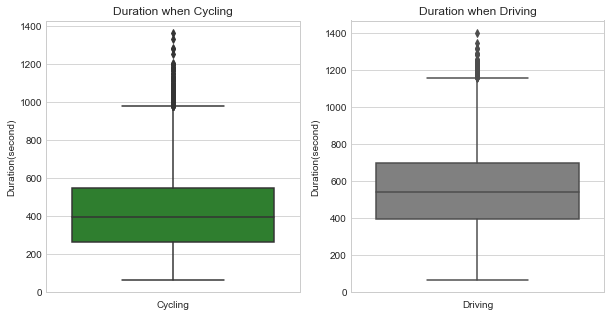

In [393]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(ax=ax[0], data=bike_faster, y='duration_min', color='forestgreen')
ax[0].set_title('Duration when Cycling')
ax[0].set_ylabel('Duration(second)')
ax[0].set_xlabel('Cycling')

sns.boxplot(ax=ax[1], data=bike_faster, y='duration_driving', color='gray')
ax[1].set_title('Duration when Driving')
ax[1].set_ylabel('Duration(second)')
ax[1].set_xlabel('Driving');

In [339]:
# take a look at the top 5 those bike faster route:
bike_faster.nlargest(5,'route_count')

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km),duration_driving,total_distance(Km),avg_trips_per_day
0,464443,Sukkerbiten--Sjøsiden ved trappen,"59.9051243807035,10.753763553726516","59.91015446696496,10.751980909227374",4031,118.0,409.601340,17967.0,0.735,324,2962.785,5.0
1,479456,Tjuvholmen--Frognerstranda,"59.90946700000001,10.722509","59.9103558,10.7051061",3803,179.0,426.010521,18518.0,1.327,217,5046.581,5.0
2,456479,Frognerstranda--Tjuvholmen,"59.9103558,10.7051061","59.90946700000001,10.722509",3640,182.0,413.120671,11536.0,1.309,200,4764.760,5.0
3,456534,Frognerstranda--Filipstadveien,"59.9103558,10.7051061","59.9102277,10.7208788",3518,159.0,394.136519,24684.0,1.296,205,4559.328,4.0
4,551489,Olaf Ryes plass--Torggata,"59.922425,10.758182000000001","59.915983092745186,10.75155119076095",3331,152.0,372.350045,13875.0,0.938,282,3124.478,4.0


__From above observation, we can see:__
* The most popular routes are the routes where riding a bike is faster than driving a car.

### Analysis Part#4<a class="anchor" id="analysis4"></a>
[*Go back: Table of Contents*](#tablecontents)

__Next step, we will check the distance, and answer: how far do riders go and how much in total and in average has cycling contributed to the city environment by saving CO2 emission.__

🚴 How far do they go?

♻️ How much CO2 emission has cycling saved?

In [297]:
route_df['distance(Km)'].describe()

count    66202.000000
mean         3.118414
std          1.630517
min          0.007000
25%          1.898000
50%          2.918000
75%          4.117750
max         12.174000
Name: distance(Km), dtype: float64

From above, we can see:
* the longest distance people have gone with bike is 12.17km.
* the shortest distance people have gone with bike is 7m.
* the average distance is 3.11km, and 75% of trips under 4.12km

In [340]:
# the shortest route:
route_df[route_df['distance(Km)'] == route_df['distance(Km)'].min()]

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km),duration_driving,total_distance(Km),avg_trips_per_day
8441,491495,Brugata--Vaterlandsparken,"59.91366109486603,10.75729364846211","59.91351552854147,10.757334670552268",147,66.0,1481.643836,6887.0,0.007,2,1.029,0.0
10205,495491,Vaterlandsparken--Brugata,"59.91351552854147,10.757334670552268","59.91366109486603,10.75729364846211",125,80.0,1559.346774,13182.0,0.007,2,0.875,0.0


In [341]:
# the longest route:
route_df[route_df['distance(Km)'] == route_df['distance(Km)'].max()]

,route_id,route,start_coordinator,end_coordinator,route_count,duration_min,duration_mean,duration_max,distance(Km),duration_driving,total_distance(Km),avg_trips_per_day
62515,589532,Huk--Brynseng T-bane,"59.898126,10.675096","59.90918420865811,10.81431433498766",2,3203.0,3388.0,3573.0,12.174,1020,24.348,0.0


From above we can see those shortest routes and longests routes are not popular. 

Next, Let's caclualte how much CO2 have been saved by cycling in our data period. The CO2 emission is based on following recourse:

> But actually driving your car is what really bumps up greenhouse gas emissions, of course. Considering the average road use of European car drivers, different fuel types and average occupation, and adding emissions from production, driving a car emits about 271 g CO2 per passenger-kilometer.(https://ecf.com/news-and-events/news/how-much-co2-does-cycling-really-save)

In [304]:
# create a column total distance for each route time number of trips
route_df['total_distance(Km)'] = route_df['distance(Km)']*route_df['route_count']

In [342]:
print('Since Y2019 until Y2021/Aug, total cycling {}km.'.format(route_df['total_distance(Km)'].sum()))

Since Y2019 until Y2021/Aug, total cycling 9543670.428km.


In [307]:
print('Since Y2019 until Y2021/Aug, cycling save {} tons of CO2 emission.'\
      .format(round(route_df['total_distance(Km)'].sum()*271/1000, 0)))

Since Y2019 until Y2021/Aug, cycling save 2586335.0 tons of CO2 emission.


In [309]:
print('Average one cycling save {} grams of CO2 emission.'.
      format(round((route_df['total_distance(Km)'].sum()*271)/(route_df.route_count.sum()),0)))

Average one cycling save 542.0 grams of CO2 emission.


## Conclusions<a class="anchor" id="conclusion"></a>
[*Go back: Table of Contents*](#tablecontents)

In this project, the following was accomplished: imported 29 datasets from website without downloading locally; Analysed 4776075 valid trips, 265 stations, and 66202 routes;
made several data visualizations and inferences about riders behavior, station usage and routes; imported extra data with help of Google Distance Matrix API, draw insights about how could we do next for future marketing strategy. 

* 😷 __How have the riding changed since pandemic?__
   
*The riding pattern has not changed, but the number of trips dramatically decreased since the pandemic, our hypothesis is mainly because of the new normal "work from home".*

* 📅 __When do they ride? at different granularity levels of date, such as year, season, month, day and hour.__

*At the month level, people ride most in the warm season between month Apr to Oct, there is a slight drop in month July, guess because of a lot of people have summer holiday in that month*

*At a week level, people ride more during working days than during weekend. Seems people use bikes most of the time for communication between work and home.*

*At a day level, during the working day, there are two peak times for bike usage, one in the morning at 6, another is in the afternoon at 2. But during the weekend, the peak time is around 1 in the afternoon.*

* 🏞️ __Where do riders go?__ 

*The top5 destinations during weekdays: Rådhusbrygge 4(224 trips/weekday), Ringnes Park(183trips/weekday), Torggata(182 trips/weekday), Alexander Kiellands Plass(179 trips/weekday), Olaf Ryes plass(178 trips/weekdays)*

*The top5 destinations during weekends: Rådhusbrygge 4(160 trips/weekendday), Olaf Ryes plass(136 trips/weekendday), Alexander Kiellands Plass(131 trips/weekendday), Ringnes Park(124 trips/weekendday), Sukkerbiten(117 trips/weekendday)*

* 💼 __Map out the "rush hour" of different stations__

*If station is not particular for outing activities, most of them have two time rush hour period on both direction traffic(arrival/departure), one in morning around 6, one in afternoon around 2pm*

*If the station is only for outing activities, then the rush hours are quite different. During the weekdays, arrival traffic peak after 11am, and departure traffic peak around 5pm, during the weekend, arrival traffic peak appears earlier which is around 10, and departure traffic peak around 2:30pm which is also earlier than weekdays.*  

* 📈 __What are the most popular cycling routes in Oslo?__

*The top routes `Sukkerbiten--Sjøsiden ved trappen`, `Tjuvholmen--Frognerstranda`, `Frognerstranda--Tjuvholmen` with average trip 5 trips a day, and routes `Frognerstranda--Filipstadveien`, `Olaf Ryes plass--Torggata`, `Ringnes Park--Alexander Kiellands Plass`, `Vår Frelsers gravlund sør--Akersgata`, `Saga Kino--Rådhusbrygge 4` with average 4 trips a day.*

* 🚴 __How far do they go?__

*The longest distance people have gone by bike is 12.17km.*
*The shortest distance people have gone by bike is 7m.*
*The average distance is 3.11km, and 75% of trips under 4.12km*

* ⚡️ __Compare the efficiency between cycling and driving?__ 

*Data shows there are a total of 30732 routes (74.3% trips) cycling can be faster than driving.* 

* ♻️ __How much CO2 emission has cycling saved?__

*Since Y2019 until Y2021/Aug, cycling save 2586335.0 tons of CO2 emission, and in average one cycling save 542.0 grams of CO2 emission.*


## Next steps <a class="anchor" id="next"></a>
[*Go back: Table of Contents*](#tablecontents) 

Next step can be to analyze real time data, and set up KPI and build an interactive dashboard with some BI tools, like tableau, powerBI or Looker, to improve the operation efficiency and system accessibility.

To encourage more people to ride bikes, maybe we could think about using data to prove to people how efficient cycling is and how much carbon emission can be saved if taking a bike instead of a car. Getting people involved with the environment change, and letting them feel putting their feet on the bicycle pedal will make us closer to reaching the Paris Agreement's goal.